In [1]:
# import pandas as pd
# from collections import defaultdict

# df = pd.read_csv('CodeBook-SELECT.csv')
# # descs = df['Description'] 

# core_desc = set([])
# core_varname = defaultdict(list)

# for i in range(0, 379):
#     desc = df.iloc[i]['Description']
#     varname = df.iloc[i]['VarName']
    
#     if varname != 'row':
#         core_desc.add(desc[0:10])
#         core_varname[desc[0:10]].append(varname)
    
# sampled_columns = []
# for desc in core_varname:
#     cols = core_varname[desc]
# #     if len(cols) > 50:
# #         cols = cols[0:50]
#     sampled_columns = sampled_columns + cols
# #     sampled_columns.append(cols[0:])
    
# len(sampled_columns)

In [2]:
# df_test = pd.read_csv('hw4-testset-gd2551.csv')
# df_train = pd.read_csv('hw4-trainingset-gd2551.csv')
# cols = df_train.select_dtypes([object]).columns
# print(len(df_train[df_train['gender_r'] == 'Male']))
# print(len(df_train[df_train['gender_r'] == 'Female']))
# print(len(df_test[df_test['gender_r'] == 'Male']))
# print(len(df_test[df_test['gender_r'] == 'Female']))

In [3]:
# type_dict = set([])
# x = 0
# for data_type in df['Description']:
#     type_dict.add(data_type)
#     if 'numeric' in data_type:
#         x = x + 1
        
# print(x)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/IPython/core/interactiveshell.py:3044: DtypeWarning: Columns (50,172,255,256,257,258,268,280,376) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x113e14ac8>]],
      dtype=object)

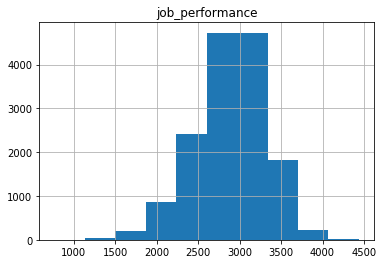

In [4]:
import pandas as pd
import numpy as np
%matplotlib inline

df = pd.read_csv('hw4-trainingset-gd2551.csv')
df = df.drop(['uni', 'row'], axis=1)
df = df.drop(df[df.gender_r == 'Male'].sample(frac=.4).index)
# df = df[sampled_columns]
# set(df['cntryid_e'].unique()).difference(set(df['cntryid'].unique()))
df.hist(column='job_performance')
# df = majority
# m_indexes = set(majority.index.to_numpy())

# sample_weights = np.zeros(20000)
# for i in range(0, len(sample_weights)):
#     if i in m_indexes:
#         sample_weights[i] = 0.25
#     else:
#         sample_weights[i] = 0.25

In [5]:
print('ALL COLUMNS')
print(len(df.columns))

# dropped_features = []
# for key in df:
#     if df[key].isna().sum() > 17500:
#         dropped_features.append(key)
        
# print('DROPPED FEATURES:')
# print(len(dropped_features))
# df = df.drop(dropped_features, axis=1)

# df = df.fillna(df.mean().iloc[0])
df = df.fillna(df.mode().iloc[0])

# Find numeric ones
cat_col = []
for col in df.columns:
#     print(df[col])
#     if isinstance(df[col][0], str):
#         cat_col.append(col)
    if not np.issubdtype(df[col].dtype, np.number):
        cat_col.append(col)

print('CAT COL')
print(len(cat_col))
        
bin_col = []
for col in cat_col:
#     x = df[col].dropna().unique() 
#     df[col] = df[col].replace(to_replace='999', value=df[col].mode())
#     print(col)
#     print(df[col].mode())
    x = df[col].unique()
    
    if len(x) < 11 and len(x) > 1:
#         print(x)
#         print(col)
#         # Get one hot encoding of columns B
#         one_hot = pd.get_dummies(df[col])
#         # Drop column B as it is now encoded
#         df = df.drop(col,axis = 1)
#         # Join the encoded df
#         df = df.join(one_hot)
        bin_col.append(col)
        df[col] = df[col].astype('category').cat.codes
        
print('BIN COL')
print(len(bin_col))

ALL COLUMNS
378
CAT COL
294
BIN COL
267


In [6]:
# Using Pearson Correlation
cor = df.corr()
cor_target = cor['job_performance']
# cor_target

relevant_features = cor_target[cor_target > -0.5]
# print(max(relevant_features))
# print(min(relevant_features))

columns = relevant_features.keys().tolist()
print(len(columns))

# columns = list(set(columns).union(set(bin_col)))
# print(len(columns))

# import sys
# sys.exit()
# columns
df = df[columns]
print(len(columns))
# df = df.drop(['isco1l', 'isco2l', 'v224', 'v105'], axis=1)
# print(df.columns.get_loc('job_performance'))
# for column in columns:#     print(df[column].unique())

350
350


In [7]:
majority = df[df['job_performance'] > 0]
majority = majority[majority['job_performance'] < 10000]
print(len(majority))

labels = df['job_performance']
df = df.drop(['job_performance'], axis=1)

majority_labels = majority['job_performance']
majority = majority.drop(['job_performance'], axis=1)

15002


In [8]:
import numpy as np
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import PolynomialFeatures


# Split the data into training/testing sets
X_train = majority.values
y_train = majority_labels.values

# poly = PolynomialFeatures(3)
# poly.fit_transform(X_train)

# gbm = xgb.XGBClassifier(max_depth=3, n_estimators=300, learning_rate=0.05).fit(X_train, y_train)
# y_pred = gbm.predict(X_train)

# Create linear regression object
clf = linear_model.LinearRegression()
# clf = linear_model.Lasso(alpha=0.1)

# Train the model using the training sets
clf.fit(X_train, y_train)

X_train = df.values
y_train = labels.values

# poly = PolynomialFeatures(3)
# poly.fit_transform(X_train)

y_pred = clf.predict(X_train)

mean_squared_error(y_train, y_pred)

98682.71181604436

In [9]:
len(clf.coef_[clf.coef_ > 0])

168

In [10]:
len(clf.coef_)

349